In [1]:
# !pip install gitpython

In [2]:
import os
import openai
import string
import random
import requests
from git import Repo
from pathlib import Path
from bs4 import BeautifulSoup as Soup

In [3]:
# Import and pass api key
with open(r'C:\Users\mhuh22\Desktop\openai_api.txt', 'r') as file:
    api_key = file.readline().strip()
os.environ['OPENAI_API_KEY'] = api_key
openai.api_key = os.getenv('OPENAI_API_KEY')

In [4]:
# Set up variables for blog posts
path_to_blog_repo = Path(r'C:\Users\mhuh22\Documents\Python\mhuh22.github.io\.git')
path_to_blog = path_to_blog_repo.parent
path_to_content = path_to_blog/"content"

# Create content path
path_to_content.mkdir(exist_ok=True,parents=True)

In [5]:
def update_blog(commit_message='Updates blog'):
    # GitPython -- Repo Location
    repo = Repo(path_to_blog_repo)
    # git add .
    repo.git.add(all=True)
    # git commit -m "Updates blog"
    repo.index.commit(commit_message)
    # git push
    origin = repo.remote(name='origin')
    origin.push()

In [6]:
# # Push an update to blog_test.html
# random_text_string = 'aoidhfosadih'

# with open(path_to_blog/"blog_test.html","w") as f:
#     f.write(random_text_string)
    
# update_blog()

In [7]:
import shutil # shell utilities

def create_new_blog(title,content,cover_image):
    cover_image = Path(cover_image)
    
    files = len(list(path_to_content.glob("*.html")))
    new_title = f"{files+1}.html"
    path_to_new_content = path_to_content/new_title
    
    # copy cover image into content
    shutil.copy(cover_image,path_to_content)
    
    # check if content exists
    if not os.path.exists(path_to_new_content):
        # write a new html file
        with open(path_to_new_content,"w") as f:
            f.write("<!DOCTYPE HTML>\n")
            f.write("<html>\n")
            f.write("<head>\n")
            f.write("<title> {title} </title>\n")
            f.write("</head>\n")
            
            f.write("<body>\n")
            f.write(f"<img src='{cover_image.name}' alt='Cover Image'> <br />\n")
            f.write(f'<h1> {title} </h1>')
            # OpenAI --> Completion GPT --> "hello\nblog post\n"
            f.write(content.replace("\n", "<br />\n"))
            f.write("</body>\n")
            f.write("</html>\n")
            print("Blog Created")
            return path_to_new_content
    else:
        raise FileExistsError("File already exists, please check your name! Aborting!")

In [8]:
def random_string(length):
    letters = string.ascii_lowercase + "\n"
    
    return ''.join(random.choice(letters) for i in range(length))

random_string(10)

'tkdpvrbuva'

In [9]:
cover_image = path_to_blog/"placeholder.png"

path_to_new_content = create_new_blog("Title", random_string(5000), cover_image=cover_image)

Blog Created


In [10]:
with open(path_to_blog/"blog_test.html") as index:
    soup = Soup(index.read())
    
str(soup)

'<html lang="en">\n<head>\n<meta charset="utf-8"/>\n<meta content="IE=edge" http-equiv="X-UA-Compatible"/>\n<meta content="width=device-width, initial-scale=1.0" name="viewport"/>\n<title>Document</title>\n</head>\n<body>\n<h1>My Blog Home Page</h1>\n<a href="blog_test.html">Home</a>\n</body>\n</html>'

In [11]:
# Check duplicate links

# write log spot link --> blog_test.html

In [12]:
soup.find_all('a')

[<a href="blog_test.html">Home</a>]

In [13]:
def check_for_duplicate_links(path_to_new_content, links):
    urls = [str(link.get("href")) for link in links]
    content_path = str(Path(*path_to_new_content.parts[-2:]))
    return content_path in urls

In [14]:
def write_to_index(path_to_new_content):
    with open(path_to_blog/"blog_test.html") as index:
        soup = Soup(index.read())

    links = soup.find_all("a")
    last_link = links[-1]
    
    if check_for_duplicate_links(path_to_new_content, links):
        raise ValueError("Link does already exist!")
        
    link_to_new_blog = soup.new_tag("a", href=Path(*path_to_new_content.parts[-2:]))
    link_to_new_blog.string = path_to_new_content.name.split(".")[0]
    last_link.insert_after(link_to_new_blog)
    
    with open(path_to_blog/"blog_test.html", "w") as f:
        f.write(str(soup.prettify(formatter='html')))

In [15]:
write_to_index(path_to_new_content)
update_blog()

In [16]:
def create_prompt(title):
    prompt="""
    Biography:
    My name is Matthew and I am an aspiring data scientist using openai api
    
    Blog
    Title: {}
    tags: tech, python, coding, AI, machine learning
    Summary: I am exploring the use cases of ai for coding
    Full test:
    """.format(title)
    return prompt

In [17]:
title = "The future of Python and AI"
print(create_prompt(title))


    Biography:
    My name is Matthew and I am an aspiring data scientist using openai api
    
    Blog
    Title: The future of Python and AI
    tags: tech, python, coding, AI, machine learning
    Summary: I am exploring the use cases of ai for coding
    Full test:
    


In [18]:
response = openai.Completion.create(
    engine='text-davinci-003',
    prompt=create_prompt(title),
    max_tokens=1000,
    temperature=0.7
)

In [19]:
blog_content = response['choices'][0]['text']

In [20]:
print(blog_content)


Python is an incredibly powerful tool for building applications and automating tasks. With the advent of artificial intelligence (AI) and machine learning, there is now an even greater potential to extend the capabilities of Python and create powerful algorithms and programs. AI and machine learning are rapidly changing the landscape of programming and the way we think about software development.

Python is now one of the most popular programming languages in the world, and its popularity is only increasing. As a result, AI and machine learning are becoming more accessible to developers around the world. AI and machine learning are used to create algorithms that can learn from data to make decisions and optimize outcomes. With the help of Python, developers are creating applications that are smarter, more accurate, and more efficient than ever before.

There are a variety of ways in which AI and machine learning can be used to improve software development in Python. One of the most po

In [21]:
def dalle2_prompt(title):
    prompt = f"Pixel art showing {title}"
    return prompt

In [22]:
image_prompt = dalle2_prompt(title)
image_prompt

'Pixel art showing The future of Python and AI'

In [23]:
img_response = openai.Image.create(prompt=image_prompt,
                                  n=1,
                                  size='1024x1024')
image_url = img_response['data'][0]['url']

In [24]:
image_url

'https://oaidalleapiprodscus.blob.core.windows.net/private/org-rJcCRVBjNHLnYAS15V6UM8XR/user-8bgNCZ7u5piYwYFIiJj3bAGr/img-MlnuyVK55ekVdTrTsZXPNEIT.png?st=2023-04-02T17%3A40%3A11Z&se=2023-04-02T19%3A40%3A11Z&sp=r&sv=2021-08-06&sr=b&rscd=inline&rsct=image/png&skoid=6aaadede-4fb3-4698-a8f6-684d7786b067&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2023-04-02T14%3A48%3A29Z&ske=2023-04-03T14%3A48%3A29Z&sks=b&skv=2021-08-06&sig=dm2ZW5g/CzldCDK5esMdSag7wqSh9XViWqahKbGGVmo%3D'

In [25]:
def save_image(image_url, file_name):
    image_res = requests.get(image_url, stream=True)
    if image_res.status_code == 200:
        with open(file_name, 'wb') as f:
            shutil.copyfileobj(image_res.raw,f)
    else:
        print('Error loading image')
        
    return image_res.status_code

save_image(image_url,'title2.png')

200

In [26]:
from PIL import Image

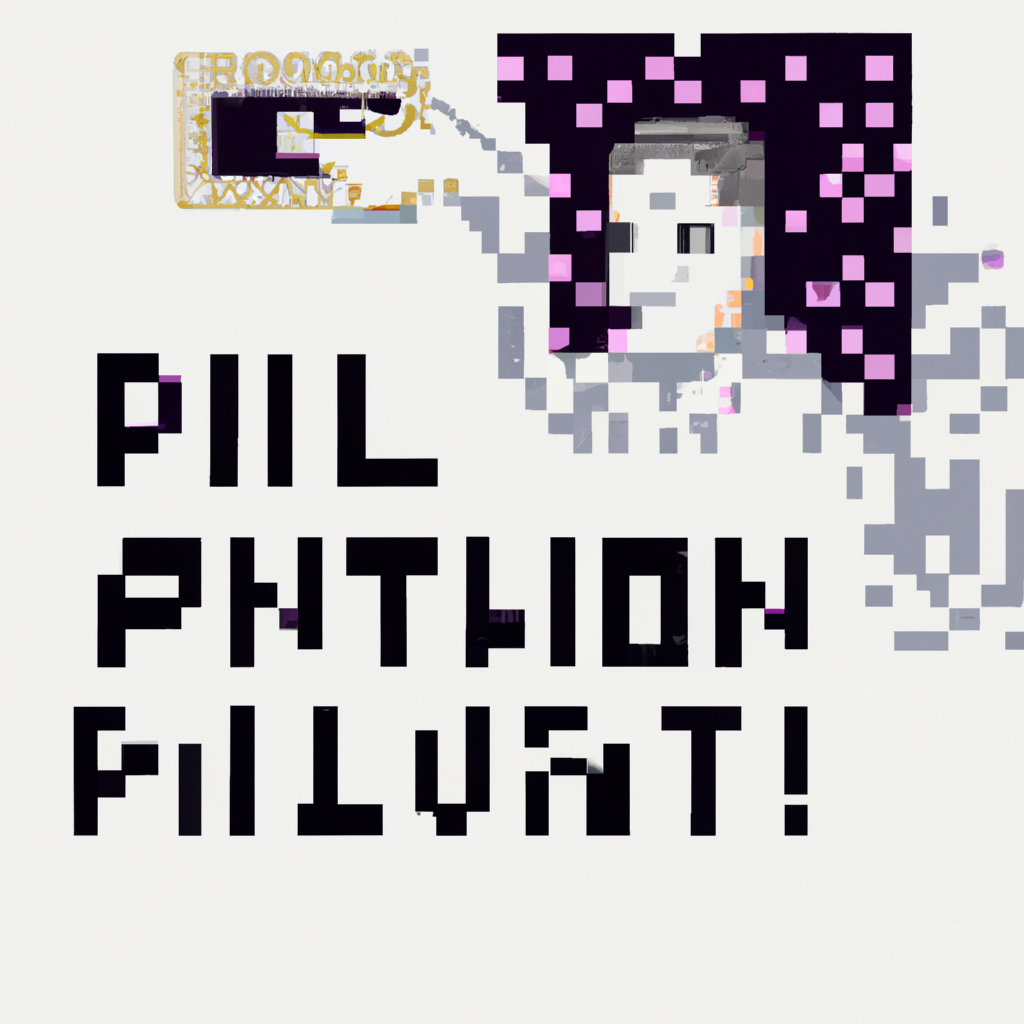

In [27]:
Image.open('title2.png')

In [28]:
# Customize the blog post
path_to_new_content = create_new_blog(title,blog_content, 'title2.png')
# Push changes to blog_test
write_to_index(path_to_new_content)
# Push changes to github
update_blog

Blog Created


<function __main__.update_blog(commit_message='Updates blog')>